In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('..')

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA, ConditionalPLSA

In [24]:
data_dir = '../data'
file = 'Full-Economic-News-DFE-839861.csv'

options = {
    'encoding': 'latin_1'
}

In [25]:
source = '/'.join([data_dir, file])

raw = pd.read_csv(source, **options)
raw.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [26]:
docs = raw.text.to_list()[:1000]
pipeline = Pipeline(*DEFAULT_PIPELINE)
corpus = Corpus(docs, pipeline)
corpus

Corpus:
Number of documents: 1000
Number of words:     8048

In [27]:
n_topics = 3

In [28]:
conditional_plsa = ConditionalPLSA(corpus, n_topics)
conditional_result = conditional_plsa.fit()
conditional_plsa

ConditionalPLSA:
Number of topics:     3
Number of documents:  1000
Number of words:      8048
Number of iterations: 17

In [29]:
visualize = Visualize(conditional_result)

In [ ]:
plsa = PLSA(corpus, n_topics)
result = plsa.fit()
plsa

In [ ]:
visualize = Visualize(result)

In [ ]:
fig, ax = plt.subplots()
susi = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


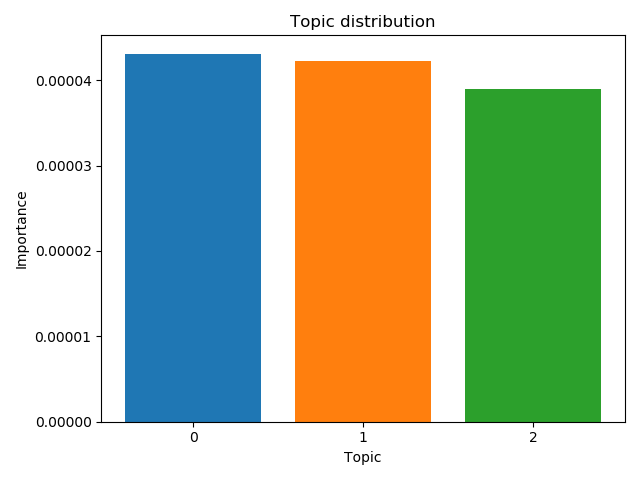

In [31]:
fig, ax = plt.subplots()
susi = visualize.topics(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


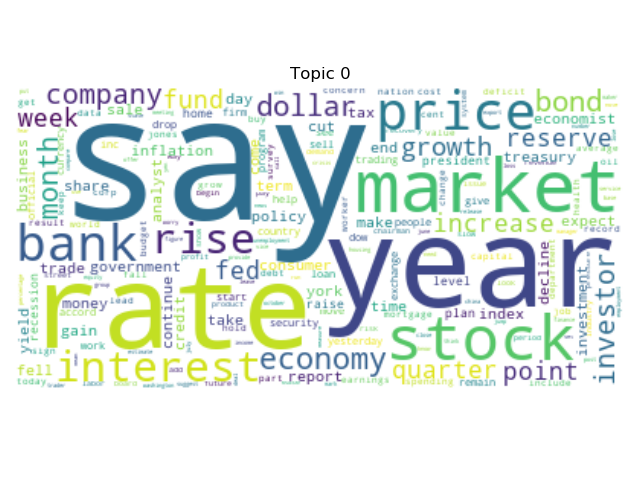

In [32]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(0, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


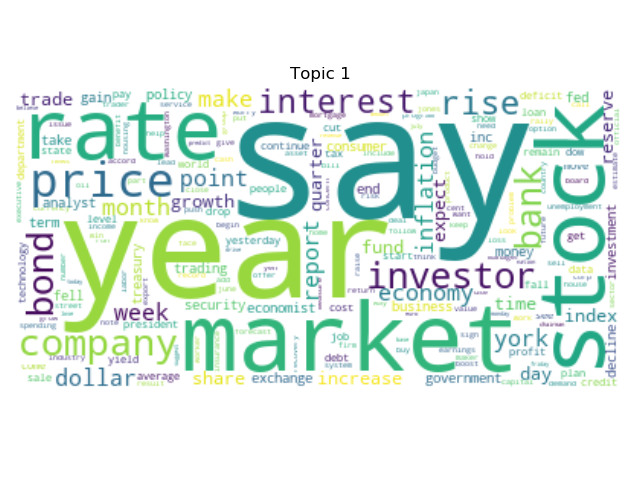

In [33]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(1, ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


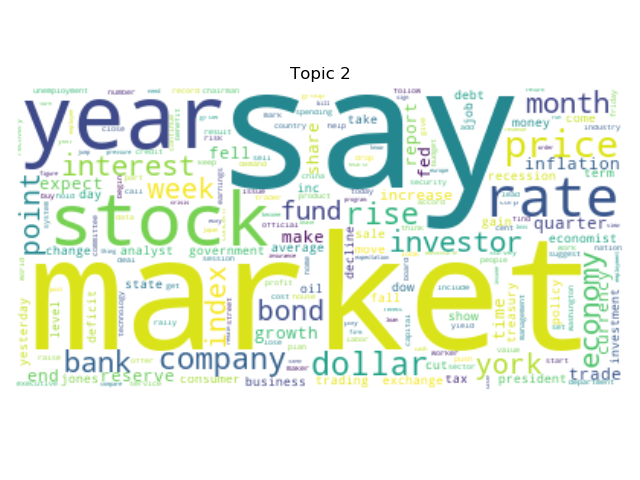

In [34]:
fig, ax = plt.subplots()
susi = visualize.words_in_topic(2, ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
susi = visualize.topics_in_doc(6, ax)
fig.tight_layout()

In [20]:
array = result.topic_given_doc
sorting_indices = array.argsort(axis=0)
ordered = array[sorting_indices, np.arange(array.shape[1])]
tmp = np.zeros((n_topics+1, corpus.n_docs))
tmp[1:, :] = ordered
gini = 1 - (tmp[1:, :] - (tmp[1:, :] - tmp[:-1, :])/2).sum(axis=0) * (1/n_topics) / 0.5

<IPython.core.display.Javascript object>


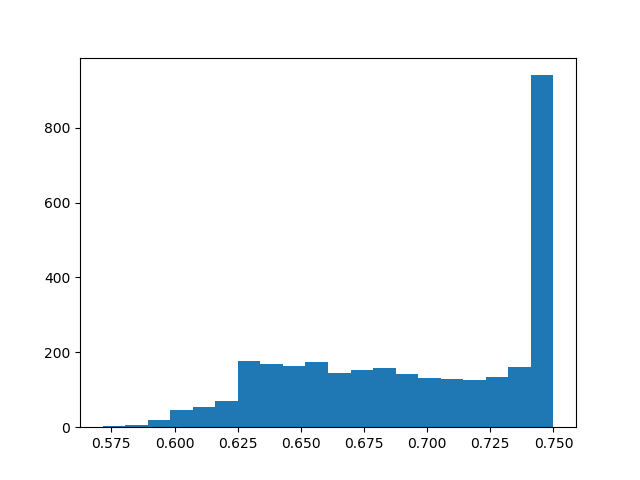

(array([  3.,   7.,  19.,  46.,  55.,  71., 176., 170., 164., 174., 146.,
        153., 157., 143., 131., 130., 126., 135., 162., 940.]),
 array([0.57151082, 0.58043528, 0.58935974, 0.5982842 , 0.60720866,
        0.61613312, 0.62505758, 0.63398204, 0.64290649, 0.65183095,
        0.66075541, 0.66967987, 0.67860433, 0.68752879, 0.69645325,
        0.70537771, 0.71430216, 0.72322662, 0.73215108, 0.74107554,
        0.75      ]),
 <a list of 20 Patch objects>)

In [22]:
fig, ax = plt.subplots()
ax.hist(gini, bins=20)

In [ ]:
fig, ax = plt.subplots()
ax.hist(gini)

In [ ]:
x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

1 - sum((x[i] - x[i-1])*(y[i] + y[i-1]) for i in range(1, 6))

In [ ]:
list(range(1, 6))

In [ ]:
pipeline['stopword_remover'] = 2

In [5]:
import os

blogposts = []

for filename in os.listdir('../data/blogs')[-100:]:
    print(filename)
    with open('../data/blogs/'+filename, encoding='latin_1') as file:
        new_post = False
        for line in file:
            if '<post>' in line:
                blogpost = ''
                new_post = True
            elif '</post>' in line:
                blogposts.append(blogpost)
                new_post = False
            if new_post:
                if '<post>' not in line:
                    blogpost = ''.join((blogpost, line.strip()))

3862449.female.17.Student.Capricorn.xml
3570427.male.27.indUnk.Aquarius.xml
2539406.male.23.Government.Cancer.xml
3553402.male.27.Accounting.Cancer.xml
3526597.male.23.Education.Aquarius.xml
3314896.male.15.indUnk.Taurus.xml
3968795.female.14.Student.Pisces.xml
3818781.female.16.indUnk.Cancer.xml
3404705.female.17.Student.Cancer.xml
4242079.male.16.Student.Libra.xml
3127881.male.24.indUnk.Aquarius.xml
3916720.male.17.indUnk.Aries.xml
1220898.male.34.indUnk.Taurus.xml
1633002.male.24.Technology.Leo.xml
2182958.male.15.Student.Libra.xml
3771679.male.43.Education.Aries.xml
3962694.female.24.indUnk.Scorpio.xml
4235954.female.39.indUnk.Capricorn.xml
2912511.female.23.indUnk.Sagittarius.xml
3578919.female.33.indUnk.Libra.xml
3541469.male.13.indUnk.Scorpio.xml
3382663.female.24.indUnk.Virgo.xml
4250672.male.15.Student.Aries.xml
3051042.female.17.Student.Capricorn.xml
3112588.male.17.Student.Aquarius.xml
3390703.female.17.Student.Aries.xml
3470958.female.15.indUnk.Leo.xml
3998000.female.17.Stu

In [ ]:
l = [1, 2, 3, 4, 5]

In [ ]:
l[-2:]

In [ ]:
for word in doc:
    print('susi')

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english') + ['nbsp', 'amp']

In [ ]:
a = np.array([[2, 4], [2, 4]])

In [ ]:
a / np.array([2, 0])

In [ ]:
a[0]